# Introduction to Machine Learning (Lab 15)

- Instructor: Jaemin Jo (Sungkyunkwan University)
- TA: Myeongwon Jung (Sungkyunkwan University)
- Topics to cover: Dimensionality Reduction

# Dimensionality Reduction
## Lecture Objectives
- Explore and understand dimensionality reduction techniques through hands-on practice.

- Understand the differences between PCA, t-SNE, and UMAP.

- Learn and experiment with the hyperparameters of each dimensionality reduction technique.

### 1. Package
- [matplotlib](https://matplotlib.org): A comprehensive library for creating static, animated, and interactive visualizations in Python.
- [scikit-learn](https://scikit-learn.org): A library for machine learning in Python.
- [umap](https://umap-learn.readthedocs.io/): A library for implementing UMAP in Python.

In [1]:
!pip install numpy matplotlib scikit-learn umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 12.1 MB/s eta 0:00:00


### 2. Dataset
[MNIST Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)

The MNIST dataset, as provided by scikit-learn, is a popular benchmark dataset used for evaluating machine learning models. It contains 8x8 grayscale pixel images of handwritten digits (0–9).

#### Description:
- **Number of Samples**: 1,797
- **Number of Features**: 64 (pixel values)
- **Number of Classes**: 10 (digits 0 through 9)

The task is to analyze and visualize the dataset using dimensionality reduction techniques like PCA, t-SNE, and UMAP to uncover meaningful patterns in the data.

In [2]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

digits = load_digits()
X = digits.data
y = digits.target

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

print("Dataset size:", X.shape)

Dataset size: (1797, 64)


### 3. Principal Component Analysis (PCA)
Principal Component Analysis (PCA) is a **linear dimensionality reduction technique** that simplifies high-dimensional data while retaining as much variance as possible. It transforms the data into a new coordinate system defined by **principal components**:
- The **first principal component** accounts for the maximum variance in the data.

- The **second principal component** is orthogonal to the first and captures the next highest variance, and so on.



#### **Key Features**
- **Linear Transformation**: Constructs new axes as linear combinations of the original features.

- **Global Structure Preservation**: Retains overall data structure, focusing on variance across the entire dataset.


#### **Strengths and Weaknesses**
- **Strengths**
    - **Noise Reduction**: Eliminates less significant dimensions, helping to focus on essential features.

    - **Global Structure Preservation**: Captures and retains the overall variance structure of the data.

- **Weaknesses**
    - **Linearity**: PCA assumes linear relationships, making it unsuitable for capturing complex, non-linear patterns.

    - **Global Focus**: Emphasizes global variance, potentially overlooking important local structures.


In [3]:
import matplotlib.pyplot as plt


def plot_embedding(Z, y, title=None, legend=True):
    plt.figure(figsize=(6, 6))
    scatter = plt.scatter(Z[:, 0], Z[:, 1], c=y, cmap="tab10", s=3)

    if legend:
        plt.legend(*scatter.legend_elements())
    if title is not None:
        plt.title(title)

    plt.show()

In [4]:
from sklearn.decomposition import PCA

reducer = PCA(n_components=2)
Z = reducer.fit_transform(X)

print("High-dimensional data shape:", X.shape)
print("Low-dimensional data shape:", Z.shape)

High-dimensional data shape: (1797, 64)
Low-dimensional data shape: (1797, 2)


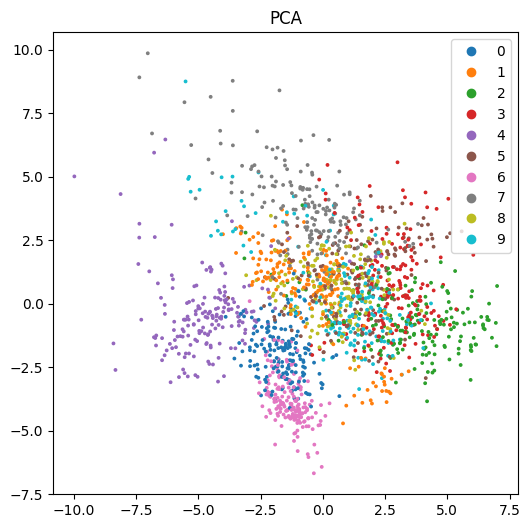

In [5]:
plot_embedding(Z, y, "PCA")

### 4. t-distributed Stochastic Neighbor Embedding (t-SNE)
t-SNE is a **non-linear dimensionality reduction technique**, focusing on preserving the **local structure** of the data and ensuring that similar points in the high-dimensional space remain close in the lower-dimensional space.

#### Key Features
- **Non-linear Method**: Unlike PCA, t-SNE is capable of capturing non-linear relationships in the data.

- **Probabilistic Modeling**: t-SNE models pairwise similarities between data points in high-dimensional and low-dimensional spaces using conditional probabilities.
   
- **Local Structure Preservation**: Emphasizes retaining the relative distances of nearby points, often at the expense of global structure.

#### Strengths and Weaknesses
- **Strengths**:
   - Effective for **visualizing clusters** in complex datasets.

   - Captures **non-linear structures** in data.

- **Weaknesses**:
   - **Computationally expensive**, especially for large datasets.

   - Focuses on local structures, potentially distorting global relationships.

   - Sensitive to hyperparameter choices.


### Hyperparameters
- **perplexity**: The perplexity parameter balances the attention between local and global aspects of the data.

   -  Typical perplexity values range from **5 to 50** and the default value is **30**.

- **learning_rate**: The learning rate controls the step size during optimization.

- **n_iter**: The number of iterations for optimization.



### Applications
- Visualizing high-dimensional data (e.g., gene expression, word embeddings).

- Exploring clusters and patterns in datasets.

In [6]:
from sklearn.manifold import TSNE

reducer = TSNE(n_components=2, perplexity=30)
Z = reducer.fit_transform(X)
print("High-dimensional data shape:", X.shape)
print("Low-dimensional data shape:", Z.shape)

High-dimensional data shape: (1797, 64)
Low-dimensional data shape: (1797, 2)


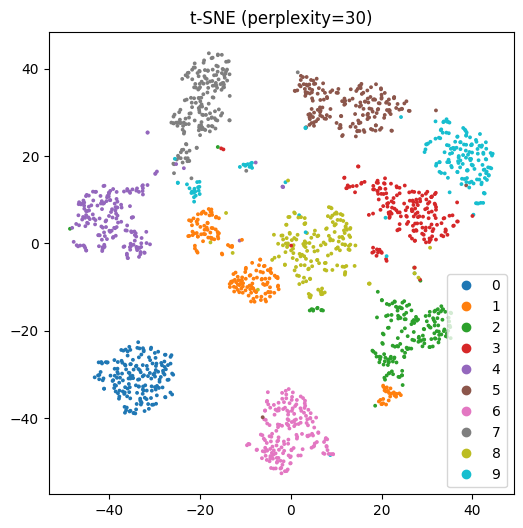

In [7]:
plot_embedding(Z, y, "t-SNE (perplexity=30)")

### 4.1 Effect of Perplexity
The **perplexity** parameter in t-SNE controls **the number of nearest neighbors** each point considers during optimization. It is crucial to choose an appropriate perplexity value to achieve optimal results.

#### Key Notes:
- Typical perplexity values range from **5 to 50**.

- **Small Perplexity**: Focuses on local relationships and emphasizes tight clusters.

- **Large Perplexity**: Considers a broader context, capturing global structure but may blur finer details.

By experimenting with different perplexity values, the trade-off between local and global structures can be explored in t-SNE visualizations.

In [8]:
from sklearn.datasets import make_swiss_roll

SR, SR_colors = make_swiss_roll(n_samples=1000, noise=0.1)

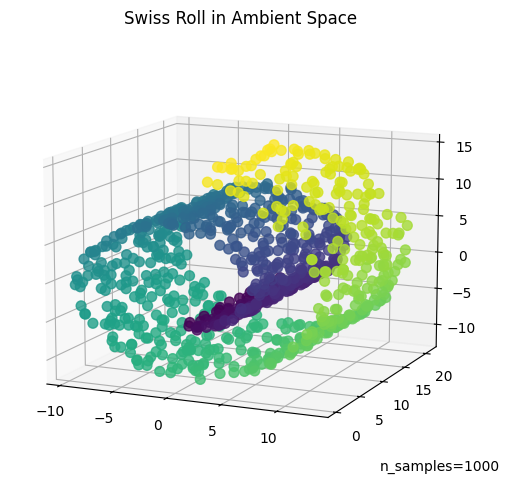

In [9]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(SR[:, 0], SR[:, 1], SR[:, 2], c=SR_colors, s=50, alpha=0.8)
ax.set_title("Swiss Roll in Ambient Space")
ax.view_init(azim=-66, elev=12)
_ = ax.text2D(0.8, 0.05, s="n_samples=1000", transform=ax.transAxes)

In [10]:
def compare_effect_of_perplexity(X, y, perplexities):
    n_params = len(perplexities)

    plt.figure(figsize=(5 * n_params, 4))

    for i, perplexity in enumerate(perplexities):
        plt.subplot(1, n_params, i + 1)

        Z = TSNE(n_components=2, perplexity=perplexity).fit_transform(X)

        plt.title(f"t-SNE (perplexity={perplexity})")
        plt.scatter(Z[:, 0], Z[:, 1], c=y, s=3)

    plt.show()

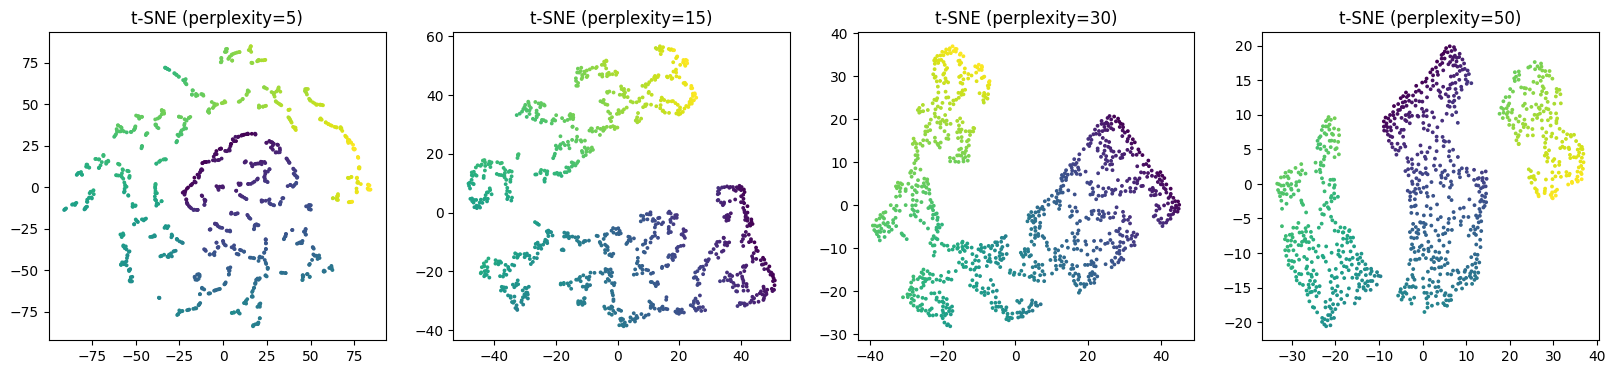

In [11]:
compare_effect_of_perplexity(SR, SR_colors, perplexities=[5, 15, 30, 50])

### 5. Uniform Manifold Approximation and Projection (UMAP)  
UMAP is a **non-linear dimensionality reduction technique** that offers a powerful approach to visualizing and understanding high-dimensional data while preserving both local and global data structures.

#### Key Features  
- **Non-linear Method**: Captures non-linear relationships in the data, similar to t-SNE but often more efficient.  

- **Graph-Based Approach**: Utilizes a k-nearest neighbor (k-NN) graph to model the data structure in high-dimensional space.  

- **Local Structure Emphasis**: Prioritizes retaining local neighborhood relationships, sometimes at the expense of global structure.

#### Strengths and Weaknesses  
- **Strengths**:  
   - **Efficient**: Faster and scalable compared to t-SNE, making it suitable for large datasets.  
   - **Flexible**: Can be used for visualization and general-purpose dimensionality reduction.  

- **Weaknesses**:  
   - Results can vary depending on hyperparameters such as the number of neighbors and minimum distance.  

### Hyperparameters
- **n_neighbors**: The number of nearest neighbors used to construct the k-NN graph. The default value is **15**.

- **min_dist**: The minimum distance between points in the low-dimensional space. The default value is **0.1**.


In [12]:
from umap import UMAP

reducer = UMAP(n_neighbors=15, min_dist=0.1)
Z = reducer.fit_transform(X)

print("High-dimensional data shape:", X.shape)
print("Low-dimensional data shape:", Z.shape)

High-dimensional data shape: (1797, 64)
Low-dimensional data shape: (1797, 2)


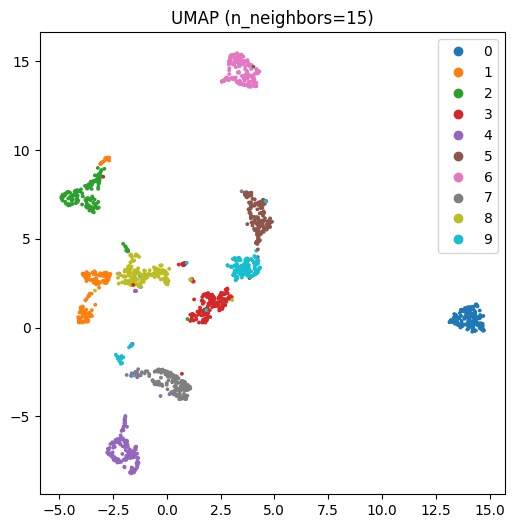

In [13]:
plot_embedding(Z, y, title="UMAP (n_neighbors=15)")

### 5.1 Effect of Hyperparameters (UMAP)

#### Key Notes:
- **n_neighbors**
    - Affects the local structure and granularity of the visualization.

    - Higher values capture more global structure, while lower values emphasize local relationships.

    - The default value is **15** and the recommended values range from **2 to 200** based on the dataset and desired outcome.

- **min_dist**:
    - Controls the minimum distance between points in the low-dimensional space, influencing the compactness of clusters.
    
    - Smaller values lead to more compact clusters.
    
    - The default value is **0.1**, and typical values range from **0.00 to 0.99**.



In [14]:
def compare_effect_of_n_neighbors(X, y, n_neighbors):
    n_params = len(n_neighbors)
    plt.figure(figsize=(5 * n_params, 4))

    for i, n in enumerate(n_neighbors):
        plt.subplot(1, n_params, i + 1)
        Z = UMAP(n_neighbors=n).fit_transform(X)
        plt.title(f"UMAP (n_neighbors={n})")
        plt.scatter(Z[:, 0], Z[:, 1], c=y, s=3)

    plt.show()

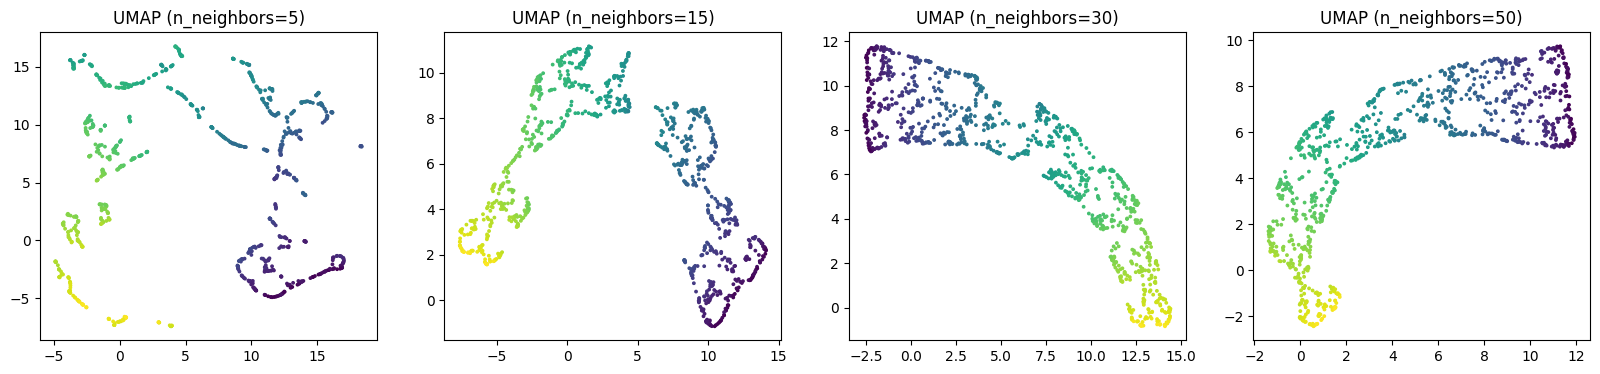

In [15]:
compare_effect_of_n_neighbors(SR, SR_colors, n_neighbors=[5, 15, 30, 50])

In [16]:
def compare_effect_of_min_dist(X, y, min_dist):
    n_params = len(min_dist)
    plt.figure(figsize=(5 * n_params, 4))

    for i, d in enumerate(min_dist):
        plt.subplot(1, n_params, i + 1)
        Z = UMAP(min_dist=d).fit_transform(X)
        plt.title(f"UMAP (min_dist={d})")
        plt.scatter(Z[:, 0], Z[:, 1], c=y, s=3)

    plt.show()

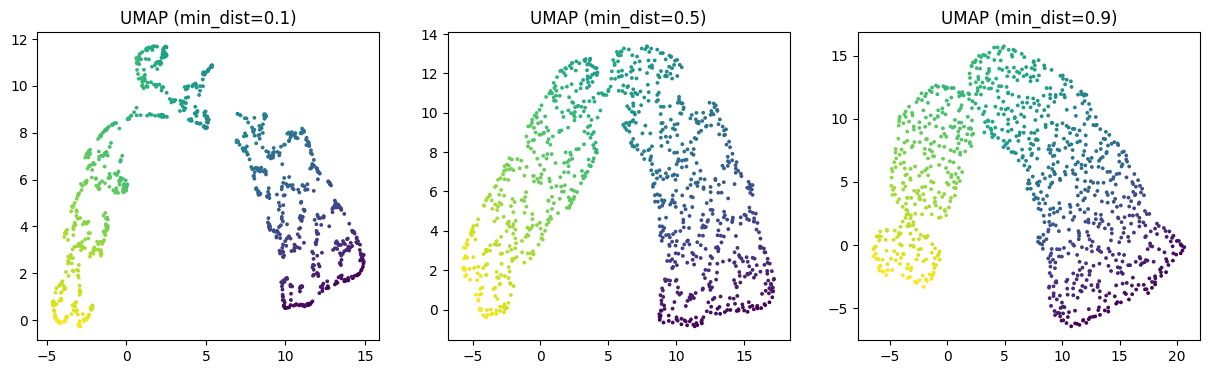

In [17]:
compare_effect_of_min_dist(SR, SR_colors, min_dist=[0.1, 0.5, 0.9])

### 6. Conclusion
- Dimensionality reduction techniques like PCA, t-SNE, and UMAP offer valuable insights into high-dimensional data by transforming it into lower-dimensional representations.

- PCA focuses on global variance, while t-SNE and UMAP emphasize local structures.

- Experimenting with hyperparameters like perplexity, learning rate, n_neighbors, and min_dist can help optimize the visualization results and uncover meaningful patterns in the data.

